# Load DataSet

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/python-Saylani/IMDB Dataset (1).csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
# Checking Dublicates
df.duplicated().sum()

np.int64(418)

In [ ]:
# Removing dublicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(49582, 2)

### Label Encoding On Sentiment Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['sentiment']=le.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#EDA

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
1,24884
0,24698


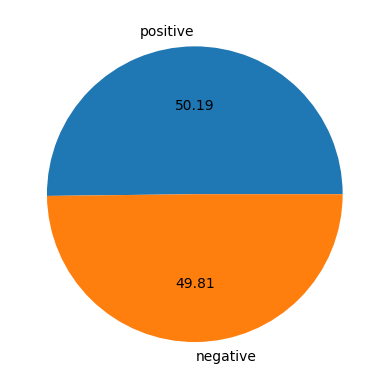

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(),labels=['positive','negative'],autopct='%0.2f')
plt.show()

In [ ]:
#making the new column of "no of characters" of each review record
df['num_characters']=df['review'].apply(len)
df.head()

,review,sentiment,num_characters
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# make a new column for "no of words" in each review record
df['num_words']=df['review'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,review,sentiment,num_characters,num_words
0,One of the other reviewers has mentioned that ...,1,1761,380
1,A wonderful little production. <br /><br />The...,1,998,201
2,I thought this was a wonderful way to spend ti...,1,926,205
3,Basically there's a family where a little boy ...,0,748,175
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283


In [ ]:
# make a new column for "no of sentences" in each review record
df['num_sentences']=df['review'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,review,sentiment,num_characters,num_words,num_sentences
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7
2,I thought this was a wonderful way to spend ti...,1,926,205,4
3,Basically there's a family where a little boy ...,0,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

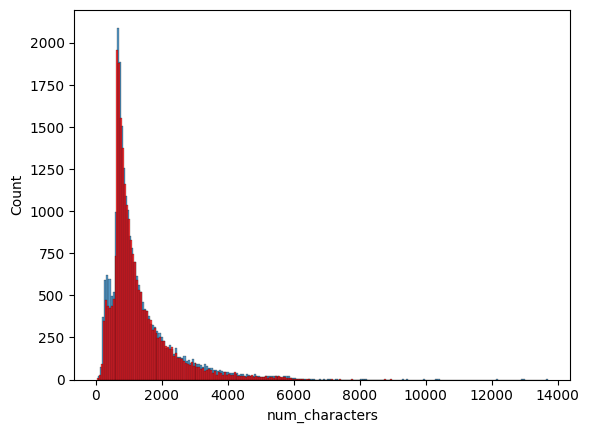

In [ ]:
#Plotting histogram on positive and negative reviews
sns.histplot(df[df['sentiment']==1]['num_characters'])
sns.histplot(df[df['sentiment']==0]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

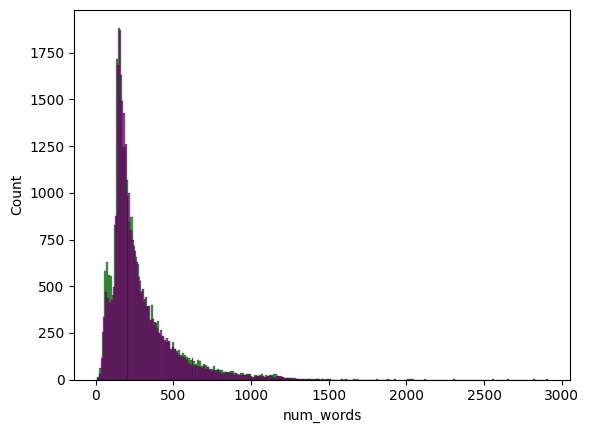

In [ ]:
#Plotting histogram on positive and negative reviews
sns.histplot(df[df['sentiment']==1]['num_words'],color='green')
sns.histplot(df[df['sentiment']==0]['num_words'],color='purple')

<Axes: xlabel='num_sentences', ylabel='Count'>

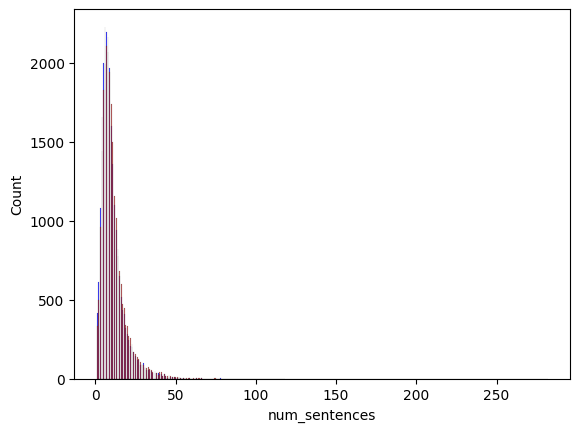

In [ ]:
#Plotting histogram on positive and negative reviews
sns.histplot(df[df['sentiment']==1]['num_sentences'],color='blue')
sns.histplot(df[df['sentiment']==0]['num_sentences'],color='brown')

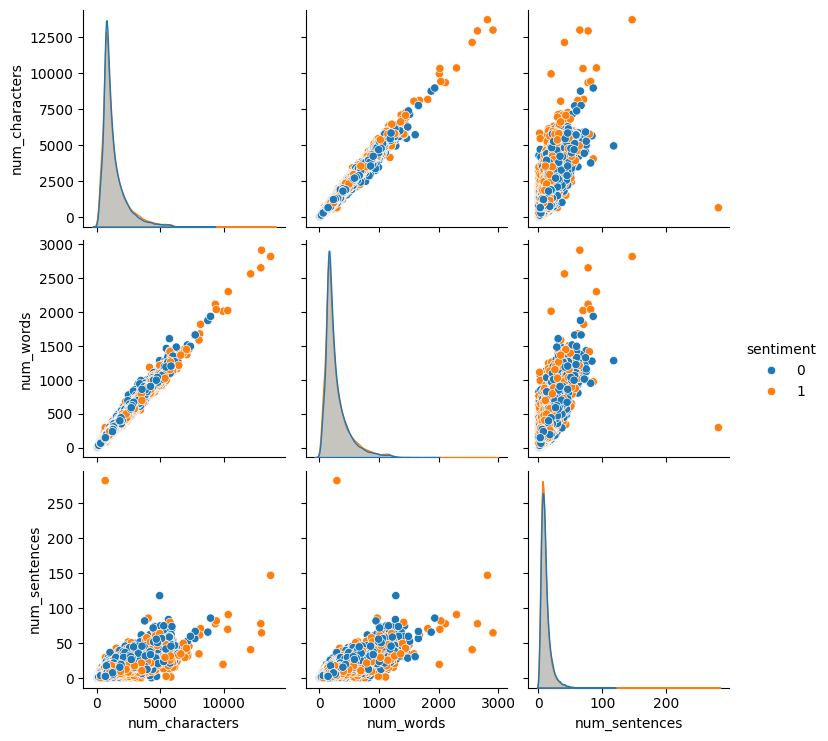

In [ ]:
# relationships
sns.pairplot(df,hue='sentiment')

In [ ]:
df.corr(numeric_only=True)

,sentiment,num_characters,num_words,num_sentences
sentiment,1.000000,0.015917,0.004498,-0.037210
num_characters,0.015917,1.000000,0.994587,0.800240
num_words,0.004498,0.994587,1.000000,0.815285
num_sentences,-0.037210,0.800240,0.815285,1.000000


<Axes: >

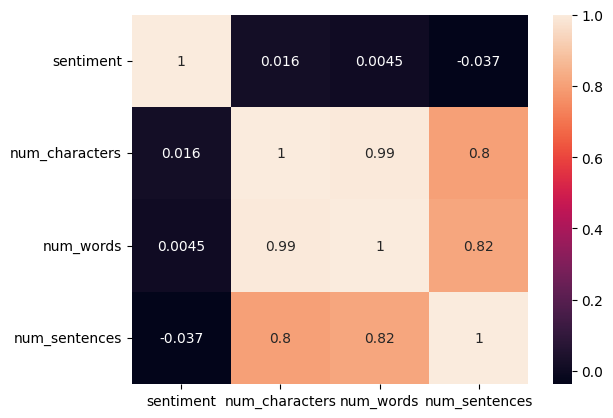

In [ ]:
#Plot Heatmap
sns.heatmap(df.corr(numeric_only=True) ,annot=True)

# Data Preprocessing

 1. Remove Chatwords
 2. Remove HTML Tags
 3. Remove URL'S
 4. Remove Punctuations
 5. Text Lowercase
 6. Remove Stopwords
 7. Tokenization



### 1. Remove Chatwords

In [ ]:

chatwords = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}

print(chatwords)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laughing my a** off', 'LOL': 'L

In [ ]:
def chat_conversation(text):
    new_text=[]
    for word in text.split():
        if word.upper() in chatwords:
            new_text.append(chatwords[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)


chat_conversation('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [ ]:
df['review']=df['review'].apply(chat_conversation)

### 2. Remove HTML Tags

In [ ]:
import re
def remove_html(text):
    clean=re.compile('<.*?>')
    return re.sub(clean,'',text)


In [ ]:

text="<h2>Design and Comfort</h2><p>The headphones feature a sleek, modern design with <em>comfortable ear cushions</em> that provide a snug fit. The adjustable headband ensures a perfect fit for all head sizes.</p>"

In [ ]:
remove_html(text)

'Design and ComfortThe headphones feature a sleek, modern design with comfortable ear cushions that provide a snug fit. The adjustable headband ensures a perfect fit for all head sizes.'

In [ ]:
df['review']=df['review'].apply(remove_html)

In [ ]:
df.review[4]

'Petter Mattei\'s "Love in the Tears in my eyes of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present Tears in my eyes New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

### 3. Remove URL'S

In [ ]:
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [ ]:
text='Battery Life One of the standout features is the impressive battery life. The headphones offer up to  30 hours of continuous playback on a single charge, making them ideal for long journeys.For more information on battery performance, read the "https://www.example.com/battery-life" battery life report'

In [ ]:
remove_url(text)

'Battery Life One of the standout features is the impressive battery life. The headphones offer up to  30 hours of continuous playback on a single charge, making them ideal for long journeys.For more information on battery performance, read the " battery life report'

In [ ]:
df['review']=df['review'].apply(remove_url)

### 4. Remove Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuations(text):
    punctuations=string.punctuation
    no_punctuations="".join([char for char in text if char not in punctuations])
    return no_punctuations

In [ ]:
text='Hello, how are you?'

In [ ]:
remove_punctuations(text)

'Hello how are you'

In [ ]:
df['review']=df['review'].apply(remove_punctuations)

In [ ]:
df.review[4]

'Petter Matteis Love in the Tears in my eyes of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money power and success do to people in the different situations we encounter This being a variation on the Arthur Schnitzlers play about the same theme the director transfers the action to the present Tears in my eyes New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has a sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitatThe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits A big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people 

### 5. Text LowerCase

In [ ]:
df['review']=df['review'].str.lower()

In [ ]:
df.review[8]

'encouraged by the positive comments about this film on here i was looking forward to watching this film bad mistake ive seen 950 films and this is truly one of the worst of them  its awful in almost every way editing pacing storyline acting soundtrack the films only song  a lame country tune  is played no less than four times the film looks cheap and nasty and is boring in the extreme rarely have i been so happy to see the end credits of a film the only thing that prevents me giving this a 1score is harvey keitel  while this is far from his best performance he at least seems to be making a bit of an effort one for keitel obsessives only'

### 6. Remove Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
lst=[]
def remove_stopwords(text):
    filtered=[word for word in text.split() if word not in stopwords]
    return " ".join(filtered)

In [ ]:
df['review']=df['review'].apply(remove_stopwords)

In [ ]:
df.review[4]

'petter matteis love tears eyes money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzlers play theme director transfers action present tears eyes new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitatthe thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounterthe acting good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alivewe wish mr mattei good luck await anxiously next work'

In [ ]:
def tokenization(text):
    word_token=word_tokenize(text)
    return word_token

In [ ]:
df['tokenized_review']=df['review'].apply(tokenization)

In [ ]:
df.head()

,review,sentiment,num_characters,num_words,num_sentences,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,1,1761,380,10,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,1,998,201,7,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend tears eyes hot sum...,1,926,205,4,"[thought, wonderful, way, spend, tears, eyes, ..."
3,basically theres family little boy jake thinks...,0,748,175,6,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love tears eyes money visually ...,1,1317,283,9,"[petter, matteis, love, tears, eyes, money, vi..."


In [ ]:
# Convert tokenized_review to strings
df['tokenized_review_str'] = df['tokenized_review'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df.head()

,review,sentiment,num_characters,num_words,num_sentences,tokenized_review,tokenized_review_str
0,one reviewers mentioned watching 1 oz episode ...,1,1761,380,10,"[one, reviewers, mentioned, watching, 1, oz, e...",one reviewers mentioned watching 1 oz episode ...
1,wonderful little production filming technique ...,1,998,201,7,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,thought wonderful way spend tears eyes hot sum...,1,926,205,4,"[thought, wonderful, way, spend, tears, eyes, ...",thought wonderful way spend tears eyes hot sum...
3,basically theres family little boy jake thinks...,0,748,175,6,"[basically, theres, family, little, boy, jake,...",basically theres family little boy jake thinks...
4,petter matteis love tears eyes money visually ...,1,1317,283,9,"[petter, matteis, love, tears, eyes, money, vi...",petter matteis love tears eyes money visually ...


In [ ]:
df['tokenized_review_str']

,tokenized_review_str
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production filming technique ...
2,thought wonderful way spend tears eyes hot sum...
3,basically theres family little boy jake thinks...
4,petter matteis love tears eyes money visually ...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...


In [ ]:
# Making Wordcloud for words
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='black')

In [ ]:
#for positive reviews
positive_wc=wc.generate(df[df['sentiment']==1]['tokenized_review_str'].str.cat(sep=" "))

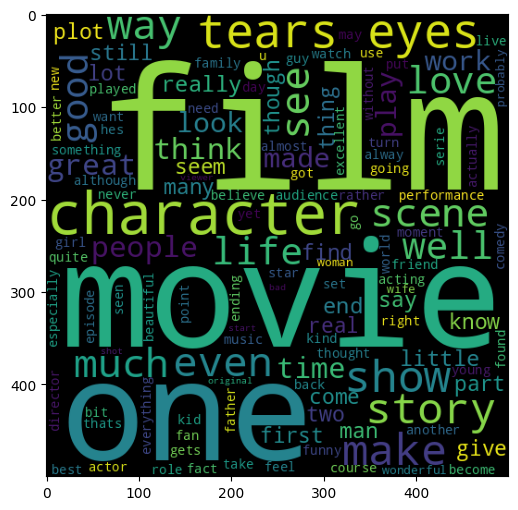

In [ ]:
plt.figure(figsize=(16,6))
plt.imshow(positive_wc)

In [ ]:
#for negative reviews
negative_wc=wc.generate(df[df['sentiment']==0]['tokenized_review_str'].str.cat(sep=" "))

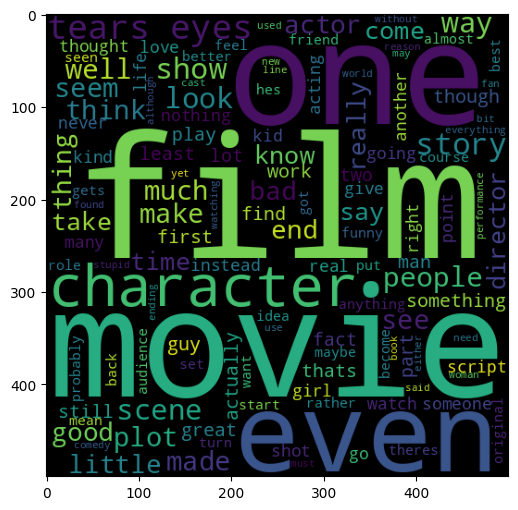

In [ ]:
plt.figure(figsize=(16,6))
plt.imshow(negative_wc)

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(dtype=int)


In [ ]:
x = vectorizer.fit_transform(df['tokenized_review_str'])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:2043: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'int'> 'dtype' will be converted to np.float64.
  warnings.warn(


In [ ]:
y=df['sentiment']

In [ ]:
x.shape

(49582, 221208)

In [ ]:
#Split dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

# Classification

1. NaiveBayes
2. Logistic Regression
3. Support Vector Machine

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
lrc=LogisticRegression(solver='liblinear',penalty='l1')

In [ ]:
classifiers={
    'SVC':svc,
    'NB':mnb,
    'LR':lrc,
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix,recall_score,f1_score

In [ ]:
def train_classifier(classifiers,x_train, y_train, x_test, y_test):
    classifiers.fit(x_train,y_train)
    y_pred=classifiers.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy,precision,recall,f1,confusion

#Model Performance And Evaluation

In [ ]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

for name, clf in classifiers.items():
    current_accuracy,current_precision,current_recall,current_f1,current_confusion=train_classifier(clf,x_train,y_train,x_test,y_test)

    print('Name ',name)
    print('Accuracy ',current_accuracy)
    print('Precision ',current_precision)
    print('Recall ',current_recall)
    print('F1 ',current_f1)
    print('Confusion ',current_confusion)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

Name  SVC
Accuracy  0.8957345971563981
Precision  0.8918652747685641
Recall  0.9032515459804509
F1  0.8975222993062438
Confusion  [[4355  549]
 [ 485 4528]]
Name  NB
Accuracy  0.8641726328526772
Precision  0.8743872549019608
Recall  0.8539796529024536
F1  0.8640629730547986
Confusion  [[4289  615]
 [ 732 4281]]
Name  LR
Accuracy  0.8820207724110114
Precision  0.8766908449323662
Recall  0.8920805904647915
F1  0.884318766066838
Confusion  [[4275  629]
 [ 541 4472]]


In [ ]:
performance_df=pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1':f1_scores})

In [ ]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1
0,SVC,0.895735,0.891865,0.903252,0.897522
1,NB,0.864173,0.874387,0.853980,0.864063
2,LR,0.882021,0.876691,0.892081,0.884319


In [ ]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.895735
1,NB,Accuracy,0.864173
2,LR,Accuracy,0.882021
3,SVC,Precision,0.891865
4,NB,Precision,0.874387
5,LR,Precision,0.876691
6,SVC,Recall,0.903252
7,NB,Recall,0.853980
8,LR,Recall,0.892081
9,SVC,F1,0.897522


In [ ]:
import seaborn as sns

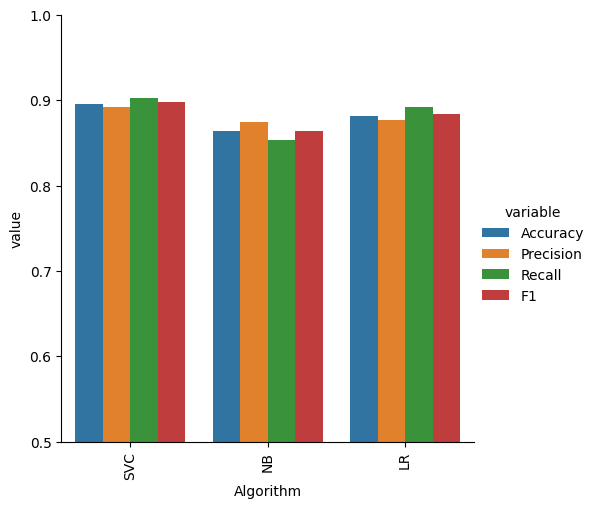

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()